In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# idx mapping

In [4]:
from torch.utils.data import Dataset
import torch
import torchvision
import torchvision.transforms as transforms
import random
from torchvision.datasets import MNIST

In [5]:
class MNIST_w_imagesums(Dataset):
    def __init__(self, dataset, aug_ratio=0.1) -> None:
        self.dataset = dataset
        self.dd_idxs_aug = {}

        self.idxs_aug = (np.arange(len(self.dataset)))
        np.random.shuffle(self.idxs_aug)
        # copying for saving indices
        self.idxs_aug_full = self.idxs_aug.copy()

        len_aug = int(aug_ratio*len(self.idxs_aug))
        # check even length of len_aug
        if len_aug % 2 == 0:
            pass
        else:
            len_aug -= 1

        idxs_aug_only = self.idxs_aug[-len_aug:] # choose last indices for augs
        for l,r in zip(idxs_aug_only[:len_aug//2], idxs_aug_only[len_aug//2:]):
            self.dd_idxs_aug[l] = r
            self.dd_idxs_aug[r] = l

        self.idxs_aug = self.idxs_aug[:-len_aug//2]



    def __getitem__(self, index: int):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        if self.idxs_aug[index] in self.dd_idxs_aug:
            img_1, target_1 = self.dataset[self.idxs_aug[index]]
            img_2, target_2 = self.dataset[self.dd_idxs_aug[self.idxs_aug[index]]]

            img = img_1 + img_2
            # img = np.maximum(img_1, img_2)

            target = str(target_1)+'+'+str(target_2)

            
            # (0,), (1.58,) was chosen base on computed statistics - see
            # see commented celll in "ae-reconstruction-L1-imagesums-lossSamples.ipynb" for code
            img=torchvision.transforms.Normalize((0,), (1.58,))(img)
        else:
            img, target = self.dataset[self.idxs_aug[index]]

        return img, target


    def __len__(self) -> int:
        return len(self.idxs_aug)

In [6]:
# seeding
SEED = 12
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [7]:
train_dataset = MNIST(root="./files", download=False)
test_dataset = MNIST(root="./files", download=False, train=False)

In [8]:
aug_ratio = 0.1
train_dataset_sums = MNIST_w_imagesums(train_dataset, aug_ratio=aug_ratio)

In [9]:
print("First 50 indices after shuffling")
train_dataset_sums.idxs_aug[:50]

First 50 indices after shuffling


array([36291, 54116, 24758, 21502,  5779, 50752, 33067, 54400, 45005,
        1522, 46327, 47504, 23765, 44398, 59047, 23252, 31344, 39629,
       18386, 46940, 18103, 23663, 19907, 46911, 26858, 36678, 52121,
       23456, 54805, 21321, 47412,  1278, 33671, 59947, 55507, 16636,
       24018, 18025, 38443, 46627,  7871, 54364,  4068, 47897, 14598,
       53213, 45727,  4933, 43701, 51755])

In [10]:
orig_idx_2_shuffle = train_dataset_sums.idxs_aug.copy()
orig_idx_2_shuffle[:50]

array([36291, 54116, 24758, 21502,  5779, 50752, 33067, 54400, 45005,
        1522, 46327, 47504, 23765, 44398, 59047, 23252, 31344, 39629,
       18386, 46940, 18103, 23663, 19907, 46911, 26858, 36678, 52121,
       23456, 54805, 21321, 47412,  1278, 33671, 59947, 55507, 16636,
       24018, 18025, 38443, 46627,  7871, 54364,  4068, 47897, 14598,
       53213, 45727,  4933, 43701, 51755])

In [92]:
new_2_orig = {}

for i, new_idx in enumerate(orig_idx_2_shuffle):
    new_2_orig[new_idx] = i

In [94]:
new_2_orig[36291]

0

# DF

In [11]:
df_my = pd.read_csv("samples_losses_57k_100epochs_mix_like_maximum.csv")
df_my

,24843,53435,13964,50719,33492,13181,38933,23356,49625,10862,...,24725,30341,33510,38754,24618,11140,21274,25666,21217,35637
0,0.468910,0.314389,0.679507,0.390326,0.338268,0.471616,0.304559,0.480588,0.525710,0.189263,...,0.369353,0.431916,0.217001,0.300074,0.385873,0.393947,0.389105,0.224619,0.478792,0.527674
1,0.468573,0.309739,0.674145,0.390368,0.337626,0.468843,0.303328,0.471981,0.522751,0.187346,...,0.365777,0.429119,0.213041,0.297230,0.382477,0.388163,0.385842,0.219864,0.472753,0.522968
2,0.549965,0.346954,0.618107,0.452697,0.398946,0.439463,0.291529,0.413766,0.518786,0.239629,...,0.351449,0.466548,0.205113,0.295832,0.402226,0.407447,0.412098,0.206828,0.446676,0.552068
3,0.544273,0.338506,0.615887,0.464785,0.410209,0.445344,0.292769,0.436947,0.510015,0.243966,...,0.354137,0.466096,0.225169,0.303904,0.395551,0.396667,0.413574,0.233458,0.468918,0.552452
4,0.474659,0.311474,0.490262,0.390027,0.337008,0.433196,0.283102,0.344372,0.499811,0.182395,...,0.340648,0.424679,0.196910,0.279139,0.376688,0.384738,0.392043,0.212800,0.465535,0.526672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.214168,0.172422,0.164487,0.142619,0.104871,0.198829,0.155599,0.103788,0.162855,0.058175,...,0.250703,0.173732,0.046587,0.121794,0.199686,0.133811,0.180154,0.060726,0.200265,0.132902
96,0.247171,0.161712,0.169760,0.153966,0.105468,0.208779,0.123181,0.112302,0.165125,0.067914,...,0.249399,0.186592,0.048216,0.129949,0.183717,0.140722,0.178591,0.050878,0.191581,0.157529
97,0.214878,0.161206,0.181695,0.140384,0.099976,0.204543,0.134146,0.103097,0.162409,0.060642,...,0.239440,0.214984,0.049033,0.128325,0.199037,0.158259,0.175566,0.062737,0.191659,0.134423
98,0.277550,0.173270,0.169018,0.148103,0.094409,0.209739,0.131242,0.133302,0.169357,0.062990,...,0.248454,0.183486,0.052145,0.141241,0.207904,0.154577,0.174875,0.064059,0.184042,0.132304


In [21]:
df_my.loc[98, '24843']

0.2775495052337646

In [12]:
samples_losses = {}
global_indexes = list(range(57000))


for g_idx in global_indexes:
    for n_epoch in range(100):
        new_idx = orig_idx_2_shuffle[g_idx]
        if samples_losses.get(new_idx) is None:
            samples_losses[new_idx] = [df_my.loc[n_epoch, str(g_idx)]]
        else:
            samples_losses[new_idx].append(df_my.loc[n_epoch, str(g_idx)])


In [105]:
orig_idx_2_shuffle[0]

36291

/var/folders/28/lrt484k161n58rg1yyfz_xw40000gq/T/ipykernel_48812/3164016275.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,200)


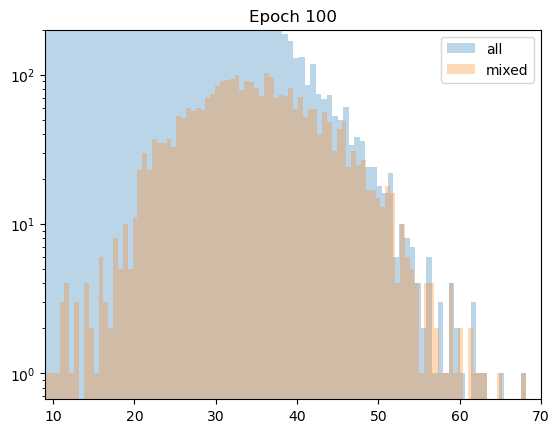

In [52]:

idx_2_sum_loss = {idx: 0 for idx in range(60000)}

start_from = 0
end = 100

for g_idx in range(57000):
  for epoch in range(start_from, end):

    new_idx = orig_idx_2_shuffle[g_idx]
    idx_2_sum_loss[new_idx] += samples_losses[new_idx][epoch]


sum_losses = idx_2_sum_loss.values()
plt.hist(sum_losses, bins=100, label="all", log=True, alpha=0.3)

mixed_samples_losses = []
for idx in range(54000, 57000):
  new_idx = orig_idx_2_shuffle[idx]
  mixed_samples_losses.append(idx_2_sum_loss[new_idx])

plt.hist(mixed_samples_losses, bins=100, label="mixed", log=True, alpha=0.3)
plt.title(f"Epoch {epoch + 1}")
plt.ylim(0, 200)
plt.xlim(9, 70)
plt.legend()
plt.show()

In [16]:
idx_2_sum_loss = {idx: 0 for idx in range(60000)}

start_from = 10
end = 100

for g_idx in global_indexes:
  new_idx = orig_idx_2_shuffle[g_idx]
  for epoch in range(start_from, end):
    idx_2_sum_loss[new_idx] += samples_losses[new_idx][epoch]

In [109]:
df_ram = pd.read_csv("cnn225k_mnist_sup_both_splits.csv")
df_ram

,index,sample_idx,scores_learning_time,preds_learning_time,scores_forgetting_time,preds_forgetting_time,original_sample_idx,is_mislabeled,prediction
0,0,26028,59367,59367,3010000,-1,39689,False,typical
1,1,6792,34998,34998,3010000,-1,28623,False,typical
2,2,2966,32257,32257,3010000,-1,58165,False,typical
3,3,27994,36990,3,3010000,-1,15180,False,typical
4,4,13494,47702,47702,3010000,-1,29298,False,typical
...,...,...,...,...,...,...,...,...,...
59995,29995,21594,29995,-1,3010000,0,9761,False,typical
59996,29996,14195,29996,-1,3010000,0,41028,False,typical
59997,29997,14053,29997,-1,3010000,0,3277,False,typical
59998,29998,22408,29998,-1,3010000,0,51903,False,typical


In [60]:
df_ram["prediction"].value_counts()

typical       59452
atypical        371
mislabeled      129
ambigious        48
Name: prediction, dtype: int64

## atypical

In [118]:
atypical_samples_losses = []

for i, atypical_row in df_ram[df_ram["prediction"] == "atypical"].iterrows():
    orig_idx = atypical_row["original_sample_idx"]
    
    atypical_samples_losses.append(idx_2_sum_loss[orig_idx])

len(atypical_samples_losses)

371

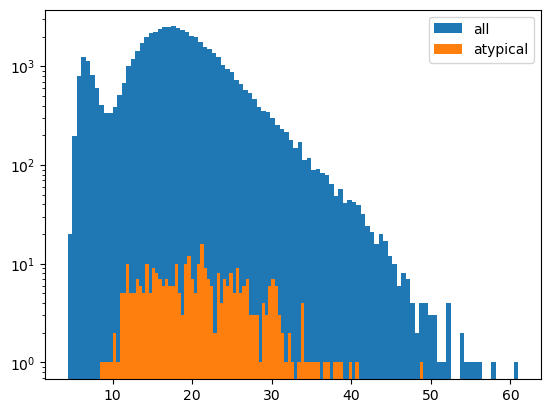

In [130]:
sum_losses = np.array(list(idx_2_sum_loss.values()))
sum_losses = sum_losses[sum_losses > 0]
plt.hist(sum_losses, bins=100, label="all", log=True)

atypical_samples_losses = np.array(atypical_samples_losses)
atypical_samples_losses = atypical_samples_losses[atypical_samples_losses > 0]
plt.hist(atypical_samples_losses, bins=100, label="atypical", log=True)
plt.legend()
plt.show()

## mislabeled

In [120]:
mislabeled_samples_losses = []
_type = "mislabeled"

for i, atypical_row in df_ram[df_ram["prediction"] == _type].iterrows():
    orig_idx = atypical_row["original_sample_idx"]
    mislabeled_samples_losses.append(idx_2_sum_loss[orig_idx])

len(mislabeled_samples_losses)

129

5


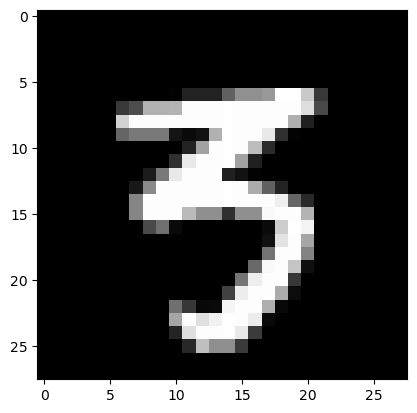

In [91]:
m_img, m_target = train_dataset[40144]

print(m_target)
plt.imshow(m_img, cmap='gray')
plt.show()

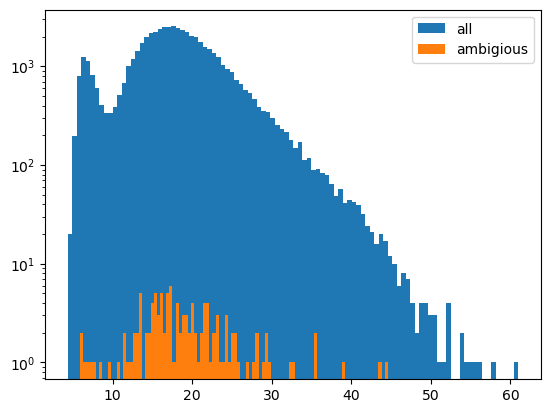

In [131]:
plt.hist(sum_losses, bins=100, label="all", log=True)
mislabeled_samples_losses = np.array(mislabeled_samples_losses)
mislabeled_samples_losses = mislabeled_samples_losses[mislabeled_samples_losses > 0]
plt.hist(mislabeled_samples_losses, bins=100, label=_type, log=True)
plt.legend()
plt.show()

## ambigious

In [122]:

ambigious_samples_losses = []
_type = "ambigious"

for i, atypical_row in df_ram[df_ram["prediction"] == _type].iterrows():
    orig_idx = atypical_row["original_sample_idx"]
    ambigious_samples_losses.append(idx_2_sum_loss[orig_idx])

len(ambigious_samples_losses)

48

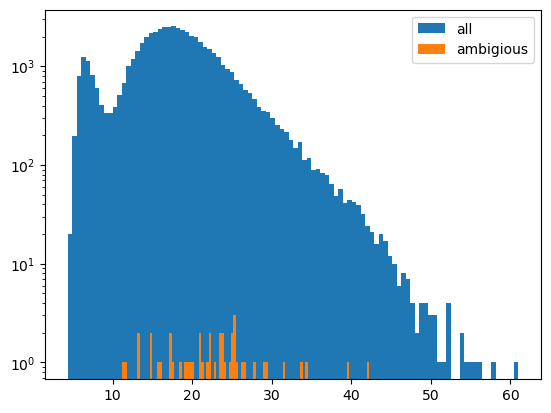

In [132]:
plt.hist(sum_losses, bins=100, label="all", log=True)
ambigious_samples_losses = np.array(ambigious_samples_losses)
ambigious_samples_losses = ambigious_samples_losses[ambigious_samples_losses > 0]
plt.hist(ambigious_samples_losses, bins=100, label=_type, log=True)
plt.legend()
plt.show()

# Metrics

In [13]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [26]:
idx_2_sum_loss = {idx: 0 for idx in range(60000)}

start_from = 0
end = 100

for g_idx in global_indexes:
  new_idx = orig_idx_2_shuffle[g_idx]
  for epoch in range(start_from, end):
    idx_2_sum_loss[new_idx] += samples_losses[new_idx][epoch]

In [27]:
sum_losses = idx_2_sum_loss.values()

In [28]:
y_true = np.zeros(60000)
for i in range(54000, 57000):
    y_true[orig_idx_2_shuffle[i]] = 1

y_true

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
q = np.quantile(np.array(list(sum_losses)), q=0.95)
print(q)
sum(np.array(list(sum_losses)) > q)

34.47250945866107


3000

In [30]:
preds = np.zeros(60000)
for idx, sl in idx_2_sum_loss.items():
  if sl > q:
    preds[idx] = 1

preds

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
print(f"{f1_score(y_true, preds)=}")
print(f"{precision_score(y_true, preds)=}")
print(f"{recall_score(y_true, preds)=}")

f1_score(y_true, preds)=0.5023333333333333
precision_score(y_true, preds)=0.5023333333333333
recall_score(y_true, preds)=0.5023333333333333


In [41]:
preds_sl = [idx_2_sum_loss[idx] for idx in range(60000) if preds[idx] == 1]
len(preds_sl)

3000

In [ ]:
mixed_samples_losses = []
for idx in range(54000, 57000):
  new_idx = orig_idx_2_shuffle[idx]
  mixed_samples_losses.append(idx_2_sum_loss[new_idx])

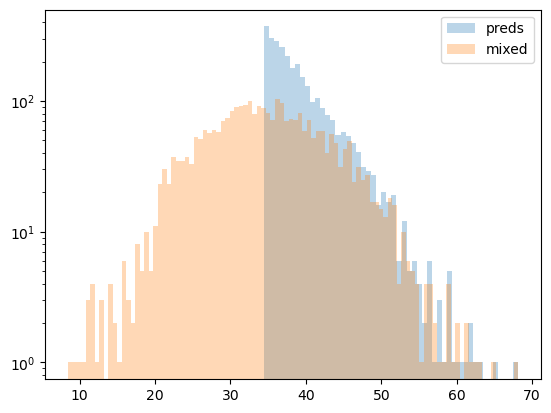

In [53]:
plt.hist(preds_sl, bins=50, label="preds", log=True, alpha=0.3)
plt.hist(mixed_samples_losses, bins=100, label="mixed", log=True, alpha=0.3)
plt.legend()
plt.show()